In [5]:
from os.path import expanduser, join

source_folder = expanduser('~/Projects/infrastructure-planning/datasets')
source_node_path = join(
    source_folder, 'ethiopia-population-by-year-for-three-cities-with-locations.csv')

In [6]:
from pandas import read_csv

source_node_table = read_csv(source_node_path)
source_node_table

,Name,Year,Population
0,Addis Ababa,2008,3385000
1,Dire Dawa,2008,607321
2,Mek'ele,2015,410217


In [7]:
# Let's assemble the table

In [8]:
import geopy

geocode = geopy.GoogleV3().geocode
for name in source_node_table['Name']:
    location = geocode(name)
    print name, location.latitude, location.longitude

Addis Ababa 8.9806034 38.7577605
Dire Dawa 9.6008747 41.850142
Mek'ele 13.4935504 39.465738


In [9]:
from pandas import DataFrame
# Demand...Projected.nodal.demand.per.year

In [10]:
"""
target_node_table = DataFrame([
    ['Addis Ababa', 8.9806034, 38.7577605, 4000000, 4000000, 1000000],
    ['Dire Dawa', 9.6008747, 41.850142, 700000, 700000, 1000000],
    ['Mek\'ele', 13.4935504, 39.465738, 500000, 500000, 1000000],
], columns=[
    'Name', 'Latitude', 'Longitude', 'Future Population', 'Future Consumption (kWh/yr)', 'Network Budget',
])
"""

target_node_table = DataFrame([
    ['Addis Ababa', 8.9806034, 38.7577605, 4000000, 4000000, 1000000],
    ['Dire Dawa', 9.6008747, 41.850142, 700000, 700000, 1000000],
    ['Mek\'ele', 13.4935504, 39.465738, 500000, 500000, 1000000],
], columns=[
    'Name', 'Y', 'X', 'Population*', 'Consumption (kWh/yr)*', 'Network Budget',
    # 'Name', 'Y', 'X', 'Future Population', 'Future Consumption (kWh/yr)', 'Network Budget',
])

target_node_table

,Name,Y,X,Population*,Consumption (kWh/yr)*,Network Budget
0,Addis Ababa,8.980603,38.757761,4000000,4000000,1000000
1,Dire Dawa,9.600875,41.850142,700000,700000,1000000
2,Mek'ele,13.493550,39.465738,500000,500000,1000000


In [11]:
from invisibleroads_macros.disk import make_folder
target_folder = make_folder('/tmp/xyz')
target_node_table_path = join(target_folder, 'nodes.csv')
target_node_table_path

'/tmp/xyz/nodes.csv'

In [12]:
target_node_table.to_csv(target_node_table_path, index=False)

In [13]:
# year, population, financing year, future population, future consumption

In [14]:
# source_node_path = expanduser('~/Projects/networker/data/max_100.csv')
# source_network_path
target_network_folder = '/tmp/networker'

In [15]:
target_node_table

,Name,Y,X,Population*,Consumption (kWh/yr)*,Network Budget
0,Addis Ababa,8.980603,38.757761,4000000,4000000,1000000
1,Dire Dawa,9.600875,41.850142,700000,700000,1000000
2,Mek'ele,13.493550,39.465738,500000,500000,1000000


In [16]:
cfg = {
    'demand_nodes': {
        'filename': target_node_table_path,
        # 'x_column': 'Longitude',
        # 'y_column': 'Latitude', 
        'x_column': 'X',
        'y_column': 'Y', 
        'budget_column': 'Network Budget',
    },
    'network_algorithm': 'mod_boruvka',
    'network_parameters': {
        'minimum_node_count': 2,
    }
}

In [17]:
from networker.networker_runner import NetworkerRunner
nwk = NetworkerRunner(cfg, target_network_folder)
nwk.validate()
nwk.run()

2016-04-11 13:37:30,080 - networker - INFO - building network
2016-04-11 13:37:30,081 - networker - INFO - running mod_boruvka on 3 demand nodes and 3 total nodes
2016-04-11 13:37:30,167 - networker - INFO - filtered result has 3 nodes and 2 edges
2016-04-11 13:37:30,168 - networker - INFO - writing output


In [14]:
from os.path import join
from sequencer import NetworkPlan
from sequencer.Models import EnergyMaximizeReturn

# source_folder = expanduser('~/Projects/sequencer/data/sumaila/input')
# csv = join(source_folder, 'metrics-local.csv')
# shp = join(source_folder, 'networks-proposed.shp')
csv = target_node_table_path
shp = join(target_network_folder, 'edges.shp')
nwp = NetworkPlan(shp, csv, prioritize='Population.')
model = EnergyMaximizeReturn(nwp)
results = model.sequence()

2016-04-06 16:16:10,694 - sequencer - INFO - Aligning Network Nodes With Input Metrics
2016-04-06 16:16:10,711 - sequencer - INFO - Computing Pairwise Distances
2016-04-06 16:16:10,712 - sequencer - INFO - Using haversine Distance
2016-04-06 16:16:10,713 - sequencer - INFO - Directing Network Away From Roots
2016-04-06 16:16:10,714 - sequencer - INFO - Directing SUBGRAPH 1 / 1
/home/rhh/.virtualenvs/134F/lib/python2.7/site-packages/pandas/core/index.py:1353: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  "use .difference()",FutureWarning)
2016-04-06 16:16:10,718 - sequencer - INFO - DONE!
2016-04-06 16:16:10,722 - sequencer - INFO - Converting The Network to a HashMap (Warning: this is time consuming for large Networks)
2016-04-06 16:16:10,722 - sequencer - INFO - Traversing The Input Network and Computing Decision Frontier



[###################################### 100.00% ######################################]
Solving Frontier of n = 1
Solving Frontier of n = 1
Solving Frontier of n = 1


/home/rhh/Projects/sequencer/sequencer/Sequencer.py:250: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.networkplan.network.edge[fnode][tnode]['distance'] = float(self.networkplan.distance_matrix[fnode, tnode])
2016-04-06 16:16:10,734 - sequencer - INFO - Joining Sequencer Results on Input Metrics
2016-04-06 16:16:10,750 - sequencer - INFO - DONE!


3
3


In [15]:
model.output_frame

,Name,Y,X,Population.,Consumption..kWh.yr.,Network.Budget,Sequence..Decision.metric,Sequence..Vertex.id,Sequence..Root.vertex.id,Sequence..Upstream.id,Sequence..Downstream.distance.sum.m,Sequence..Upstream.segment.distance.m,Sequence..Downstream.demand.sum.kwh,Sequence..Far.sighted.sequence,coords
0,Addis Ababa,8.980603,38.757760,4000000,4000000,1000000,6.754872,1,NaN,NaN,769814.777614,0.000000,5200000,1,"(38.7577605, 8.9806034)"
1,Dire Dawa,9.600875,41.850142,700000,700000,1000000,1.558817,0,1,1,769814.777614,347854.314239,1200000,2,"(41.850142, 9.6008747)"
2,Mek'ele,13.493550,39.465738,500000,500000,1000000,1.184945,2,1,0,421960.463375,421960.463375,500000,3,"(39.465738, 13.4935504)"


In [15]:
from invisibleroads_macros.disk import make_folder

target_sequence_folder = make_folder('/tmp/sequencer')
model.output(target_folder)

1
2
3
4
5


In [17]:
model.output_frame.to_csv('/tmp/sequencer/xyz.csv', index=False)

In [3]:
from os.path import expanduser

geometry1_path = expanduser('~/Projects/sequencer/data/sumaila/input/networks-proposed.shp')
geometry2_path = '/tmp/networker/edges.shp'
geometry3_path = '/tmp/networker/nodes.shp'

In [4]:
from geometryIO import load
a, b, c, d = load(geometry1_path)
print a
print b[:2]
print c[:2]
print d

+proj=longlat +datum=WGS84 +no_defs 
[<shapely.geometry.linestring.LineString object at 0x7f75a654e990>, <shapely.geometry.linestring.LineString object at 0x7f75a654ea90>]
[(0,), (1,)]
[('FID', 12)]


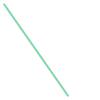

In [5]:
b[0]

In [6]:
from geometryIO import load
a, b, c, d = load(geometry2_path)
print a
print b[:2]
print c[:2]
print d

GeometryError: Could not load edges.shp

In [32]:
from geometryIO import load
a, b, c, d = load(geometry3_path)
print a
print b[:2]
print c[:2]
print d

+proj=longlat +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +no_defs 
[<shapely.geometry.point.Point object at 0x7f5ec7cf7890>, <shapely.geometry.point.Point object at 0x7f5ec7cf7a10>]
[(0,), (1,)]
[('FID', 12)]


In [ ]:
# Review how to compute grid mv network budget

In [ ]:
def compute(self):
    return self.get(GridExternalSystemInitialCostPerMeter) + self.get(GridExternalSystemNodalDiscountedRecurringCostPerMeter)

def compute(self):
    # Compute the cost of the cheapest standalone option for the node
    standaloneCost = min(
        self.get(costOffGrid.OffGridSystemNodalDiscountedCost),
        self.get(costMiniGrid.MiniGridSystemNodalDiscountedCost))
    # Compute the (non-negative) amount of money we have left to spend on grid extension
    gridExternalBudget = max(0, standaloneCost - self.get(costGrid.GridInternalSystemNodalDiscountedCost))
    # Compute the length of line we are allowed for grid extension
    return gridExternalBudget / float(self.get(costGrid.GridExternalSystemNodalDiscountedCostPerMeter))

In [2]:
d = {'one': 1, 'two': 2}
e = ['three', 'four']
from itertools import product
list(product(d, e))

[('two', 'three'), ('two', 'four'), ('one', 'three'), ('one', 'four')]

In [4]:
discounted_system_cost_by_technology = {
    'grid': 3000,
    'diesel_mini_grid': 5000,
    'solar_home': 10000,
}

In [7]:
standalone_cost = min(
    v for k, v in discounted_system_cost_by_technology.items() if k != 'grid')
standalone_cost

5000

In [8]:
mv_network_budget = standalone_cost - discounted_system_cost_by_technology['grid']
mv_network_budget

2000

In [ ]:
grid_mv_line_installation_lm_cost_per_meter
grid_mv_line_maintenance_lm_cost_per_meter_per_year
grid_mv_line_lifetime_in_years

In [ ]:
# grid_discounted_mv_line_cost_per_meter
grid_mv_line_discounted_cost_per_meter

In [ ]:
mv_network_budget_in_meters

In [1]:
from pandas import DataFrame

In [3]:
table = DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=['A', 'B', 'C'])
table

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [5]:
table.rename(columns={'A': 'a'})

,a,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [6]:
table

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [14]:
table.sort('C').index[-1]

2

In [11]:
table.index

Int64Index([0, 1, 2], dtype='int64')

In [1]:
import networkx as nx

In [7]:
g = nx.Graph()

In [8]:
g.add_node(1, {'a': 'apple'})
g.add_node(2, {'a': 'avocado'})

In [9]:
g.nodes(data=True)

[(1, {'a': 'apple'}), (2, {'a': 'avocado'})]

In [ ]:
# Given a graph, make a table


In [6]:
nx.to_pandas_dataframe(g)

,1
1,0


In [36]:
from pandas import DataFrame
table = DataFrame(x[1] for x in g.nodes(data=True))
table

,a,b
0,apple,butt
1,avocado,butt


In [23]:
g = nx.Graph()
for index, row in table.iterrows():
    g.add_node(index, dict(row))

In [22]:
dict(row)

{'a': 'avocado'}

In [27]:
import inspect

def f(infrastructure_table):
    pass

argument_specification = inspect.getargspec(f)

In [28]:
argument_specification

ArgSpec(args=['infrastructure_table'], varargs=None, keywords=None, defaults=None)

In [32]:
from invisibleroads_macros.iterable import merge_dictionaries

g = nx.Graph()
for index, row in table.iterrows():
    g.add_node(index, merge_dictionaries({'b': 'butt'}, row))

In [33]:
g

In [37]:
f.func_name

'f'

In [1]:
from pandas import DataFrame
table = DataFrame([
    ('X', '2008', '1000'),
    ('X', '2009', '2000'),
    ('Y', '2009', '1500'),
], columns=['Name', 'Year', 'Population'])
table

,Name,Year,Population
0,X,2008,1000
1,X,2009,2000
2,Y,2009,1500


In [2]:
g = table.sort('Year').groupby('Name')
t = g.last()
t

,Year,Population
Name,,
X,2009,2000
Y,2009,1500


In [4]:
t.reset_index()

,Name,Year,Population
0,X,2009,2000
1,Y,2009,1500


In [22]:
from geometryIO import load
from os.path import join

In [23]:
source_folder = '/tmp/estimate-electricity-cost-by-technology-from-population/results/6'

In [24]:
ls $source_folder

common_values.csv                           nodes.prj
edges.dbf                                   nodes.shp
edges.prj                                   nodes.shx
edges.shp                                   result.cfg
edges.shx                                   standard_error.log
infrastructure.csv                          standard_output.log
internal_discounted_cost_by_technology.csv  unique_values.csv
internal_levelized_cost_by_technology.csv   unique_values_transposed.csv
nodes.dbf                                   yearly_values.csv


In [25]:
nodes = load(join(source_folder, 'nodes.shp'))
edges = load(join(source_folder, 'edges.shp'))

In [31]:
nodes[3]

[('FID', 12)]

In [43]:
edges[2]

[('346282.2310794288',), ('504782.8745282977',)]

In [ ]:
nodes[]

In [40]:
from pandas import DataFrame

In [44]:
from shapely.geometry import LineString

In [45]:
LineString?